<a href="https://colab.research.google.com/github/Heal-me-KI/KI_Task/blob/main/TaskWeek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Hilmy Ismail Hidayat**

# **NPM : 2206048575**

# **Huggingface model : mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis**

# Running model from huggingface

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import pipeline

# Load the sentiment-analysis pipeline using the model
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
)

In [ ]:
# Example: Analyzing the sentiment of financial news
texts = [
    "The company's profits surged in the last quarter.",
    "The stock market crash resulted in heavy losses.",
    "The merger will likely boost the company's valuation.",
    "Tomorrow is the company meeting"
]

# Get sentiment predictions
results = sentiment_analyzer(texts)

# Print the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']} (Score: {result['score']:.2f})\n")

Text: The company's profits surged in the last quarter.
Sentiment: positive (Score: 1.00)

Text: The stock market crash resulted in heavy losses.
Sentiment: negative (Score: 1.00)

Text: The merger will likely boost the company's valuation.
Sentiment: positive (Score: 1.00)

Text: Tomorrow is the company meeting
Sentiment: neutral (Score: 1.00)



# Checking the model’s accuracy using a synthetic dataset

In [ ]:
!pip install transformers torch scikit-learn


In [ ]:
from transformers import pipeline
from sklearn.metrics import accuracy_score

# Load the sentiment-analysis pipeline
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
)

In [ ]:
# Synthetic financial texts with known sentiments
synthetic_data = [
    {"text": "The company's revenue grew significantly this year.", "label": "POSITIVE"},
    {"text": "The stock prices plummeted after the announcement.", "label": "NEGATIVE"},
    {"text": "The economy is stable with no major disruptions.", "label": "POSITIVE"},
    {"text": "The merger has increased shareholder confidence.", "label": "POSITIVE"},
    {"text": "The CEO's resignation caused uncertainty among investors.", "label": "NEGATIVE"},
    {"text": "The central bank kept interest rates unchanged.", "label": "NEUTRAL"},
    {"text": "The company has launched a promising new product.", "label": "POSITIVE"},
    {"text": "The pandemic has hurt sales across all sectors.", "label": "NEGATIVE"},
    {"text": "The quarterly performance is as expected.", "label": "NEUTRAL"}
]


In [ ]:
# Extract texts for prediction
texts = [item["text"] for item in synthetic_data]

# Predict sentiment using the pipeline
predictions = sentiment_analyzer(texts)

# Convert predictions to the same label format as the synthetic data
predicted_labels = [pred["label"].upper() for pred in predictions]  # Ensure labels are uppercase
true_labels = [item["label"] for item in synthetic_data]


In [ ]:
# Calculate and display the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy original: {accuracy * 100:.2f}%")

# Display predictions for each example
for text, true, pred in zip(texts, true_labels, predicted_labels):
    print(f"Text: {text}\nTrue Label: {true}, Predicted Label: {pred}\n")


Accuracy original: 100.00%
Text: The company's revenue grew significantly this year.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The stock prices plummeted after the announcement.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The economy is stable with no major disruptions.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The merger has increased shareholder confidence.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The CEO's resignation caused uncertainty among investors.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The central bank kept interest rates unchanged.
True Label: NEUTRAL, Predicted Label: NEUTRAL

Text: The company has launched a promising new product.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The pandemic has hurt sales across all sectors.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The quarterly performance is as expected.
True Label: NEUTRAL, Predicted Label: NEUTRAL



# Implementing attention transformer on that model

In [ ]:
!pip install transformers torch matplotlib

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt

# Load the tokenizer and model
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def visualize_attention(text, layer=0, head=0):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt")

    # Forward pass through the model to get outputs with attentions
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract token ids and attention weights
    token_ids = inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(token_ids)
    attention = outputs.attentions[layer][0, head]

    # Plot the attention scores
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(attention, cmap='viridis')

    # Set the labels
    ax.set_xticks(range(len(tokens)))
    ax.set_yticks(range(len(tokens)))
    ax.set_xticklabels(tokens, rotation=90)
    ax.set_yticklabels(tokens)

    plt.show()

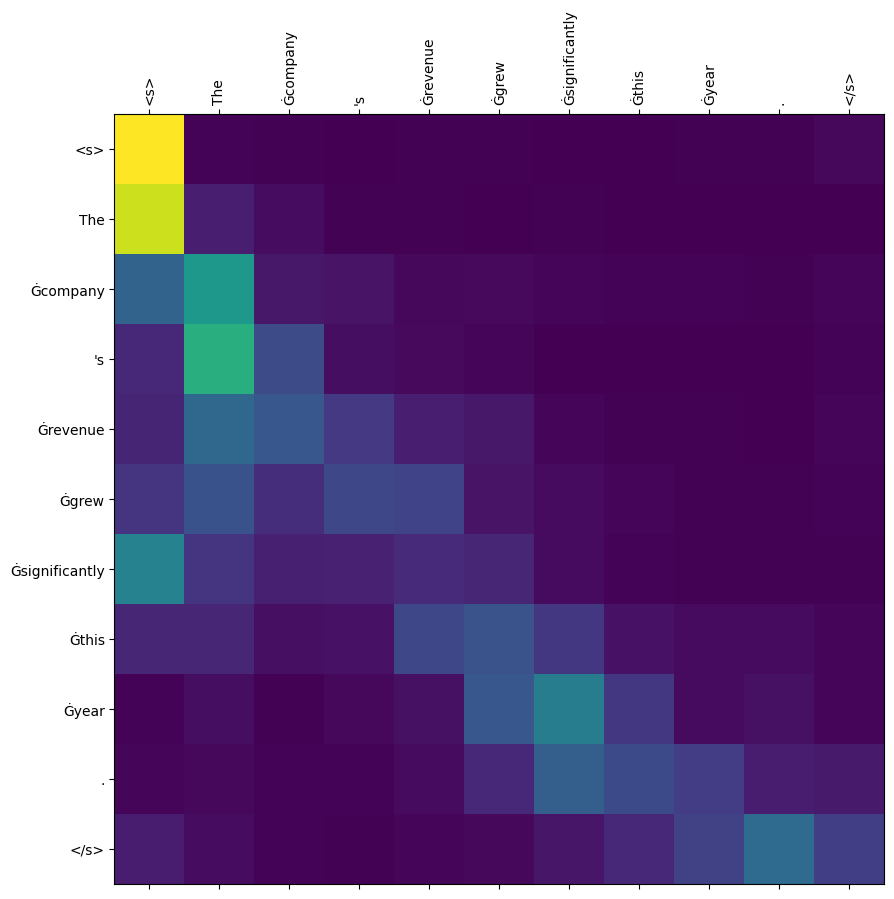

In [ ]:
# Example text to visualize attention
text = "The company's revenue grew significantly this year."

# Visualize attention from the first layer and first head
visualize_attention(text, layer=0, head=0)

# Checking the model accuracy after using attention transformer using the same synthetic dataset

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer, pipeline
from sklearn.metrics import accuracy_score

# Load the sentiment-analysis pipeline
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Load the original sentiment-analysis pipeline for comparison
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=model_name
)


Some weights of RobertaModel were not initialized from the model checkpoint at mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Function to extract attention and make predictions
def predict_with_attention(texts):
    predicted_labels = []

    for text in texts:
        # Tokenize the input text
        inputs = tokenizer(text, return_tensors="pt")

        # Forward pass through the model to get outputs with attentions
        with torch.no_grad():
            outputs = model(**inputs)

        # Get the attention weights (you can change the layer and head)
        attention = outputs.attentions[0][0, 0]  # Using the first layer and first head
        attention = attention.mean(dim=0)  # Average over heads if needed

        # Use the original sentiment analyzer for the prediction
        sentiment = sentiment_analyzer(text)[0]["label"].upper()
        predicted_labels.append(sentiment)

    return predicted_labels

# Extract texts for prediction
texts = [item["text"] for item in synthetic_data]

# Get predictions using the model with attention
predicted_labels_with_attention = predict_with_attention(texts)


In [ ]:
# True labels
true_labels = [item["label"] for item in synthetic_data]

# Calculate and display the accuracy
accuracy_with_attention = accuracy_score(true_labels, predicted_labels_with_attention)
print(f"Accuracy with Attention: {accuracy_with_attention * 100:.2f}%")

# Display predictions for each example
for text, true, pred in zip(texts, true_labels, predicted_labels_with_attention):
    print(f"Text: {text}\nTrue Label: {true}, Predicted Label: {pred}\n")


Accuracy with Attention: 100.00%
Text: The company's revenue grew significantly this year.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The stock prices plummeted after the announcement.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The economy is stable with no major disruptions.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The merger has increased shareholder confidence.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The CEO's resignation caused uncertainty among investors.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The central bank kept interest rates unchanged.
True Label: NEUTRAL, Predicted Label: NEUTRAL

Text: The company has launched a promising new product.
True Label: POSITIVE, Predicted Label: POSITIVE

Text: The pandemic has hurt sales across all sectors.
True Label: NEGATIVE, Predicted Label: NEGATIVE

Text: The quarterly performance is as expected.
True Label: NEUTRAL, Predicted Label: NEUTRAL



# compare both accuracy with or without Attention Transformer

In [ ]:
print(f"Accuracy original: {accuracy * 100:.2f}%")
print(f"Accuracy with Attention: {accuracy_with_attention * 100:.2f}%")

Accuracy original: 100.00%
Accuracy with Attention: 100.00%
